In [1]:
import pandas as pd
pd.options.display.max_columns=200
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px
import researchpy as rp
import warnings 
warnings.filterwarnings('ignore')
from sklearn.dummy import DummyRegressor

In [2]:
data = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [3]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01
3373,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimmin

In [4]:
data.set_index('OSEBuildingID', inplace = True)

In [5]:
data['BuildingType'].value_counts(dropna=False)

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [6]:
df=data.copy()

In [7]:
df.drop(labels=df.loc[df['BuildingType'].str.startswith("Multifamily")].index, axis = 0, inplace = True)

In [8]:
df['YearBuilt']=df['DataYear']-df['YearBuilt']
df.rename(columns={'YearBuilt' : 'Age'},inplace = True)

In [9]:
df['PropertyGFAParking']=df['PropertyGFAParking']/df['PropertyGFATotal']*100
df['PropertyGFABuilding(s)']=df['PropertyGFABuilding(s)']/df['PropertyGFATotal']*100

In [10]:
df.rename(columns={'PropertyGFAParking' : 'PropertyGFAParking(%)' , 'PropertyGFABuilding(s)' : 'PropertyGFABuilding(s)(%)'},inplace = True)

In [11]:
df.rename(columns={'SteamUse(kBtu)' : 'SteamUse(%)' , 'Electricity(kBtu)' : 'Electricity(%)' , 'NaturalGas(kBtu)' : 'NaturalGas(%)'},inplace = True)

In [12]:
df.drop(labels=df.loc[~df['Outlier'].isnull()].index, axis = 0, inplace = True)

In [13]:
basket = ['DataYear','BuildingType','PropertyName','Address','City','State','ZipCode','TaxParcelIdentificationNumber',
         'Neighborhood','Latitude','Longitude','ListOfAllPropertyUseTypes','LargestPropertyUseType','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA',
         'ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA','YearsENERGYSTARCertified','Electricity(kWh)',
         'NaturalGas(therms)','Comments','DefaultData','ComplianceStatus','Outlier']
df.drop(labels=basket , axis = 1, inplace = True)

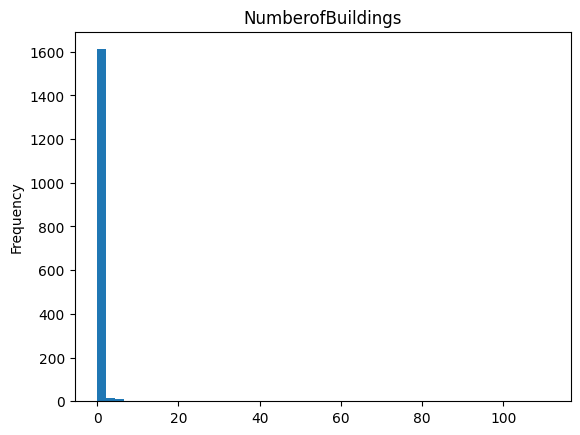

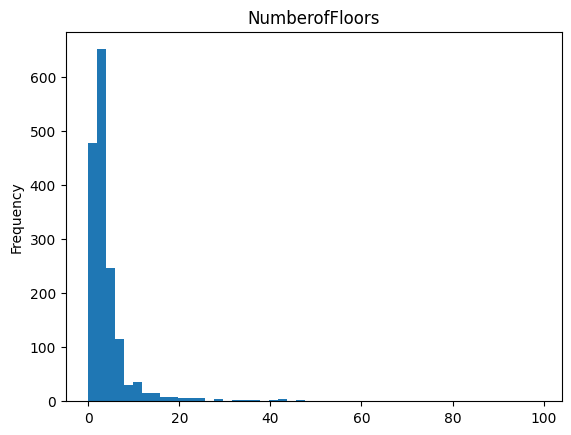

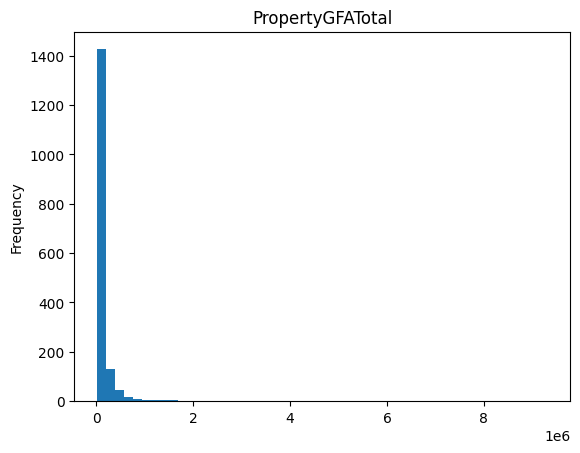

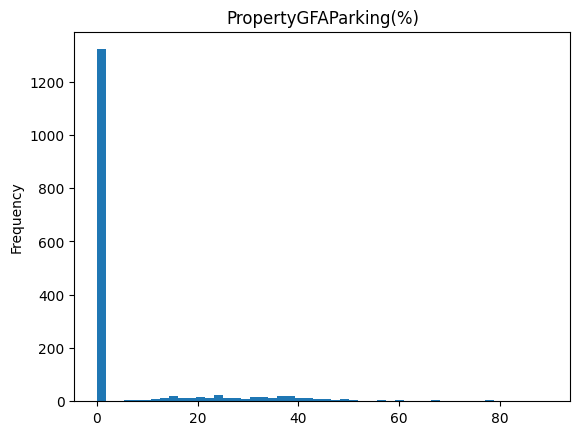

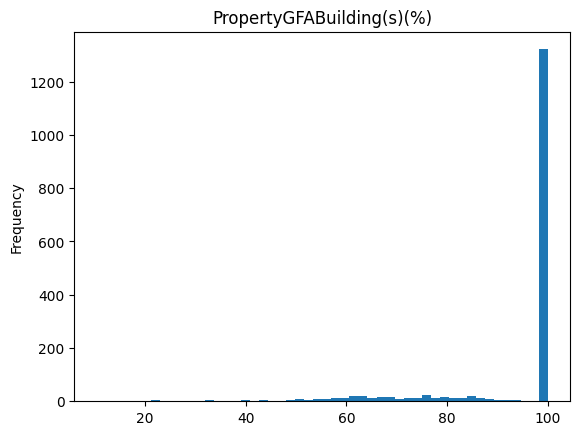

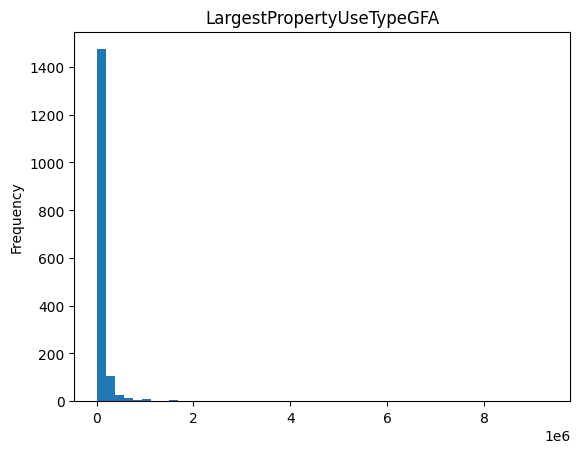

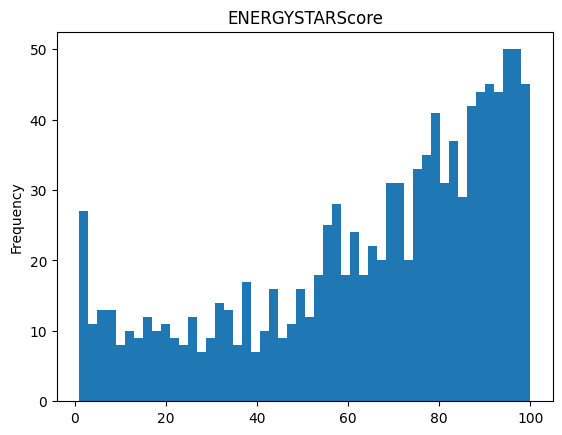

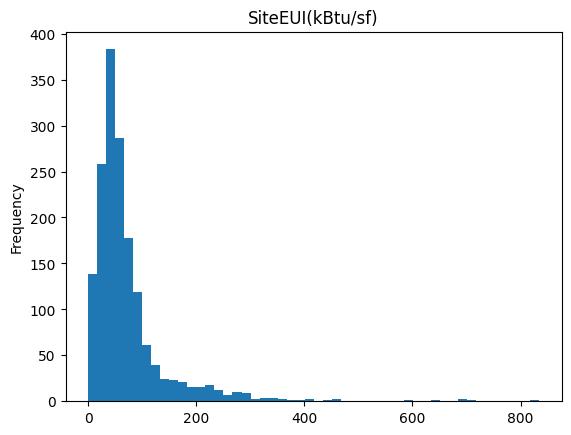

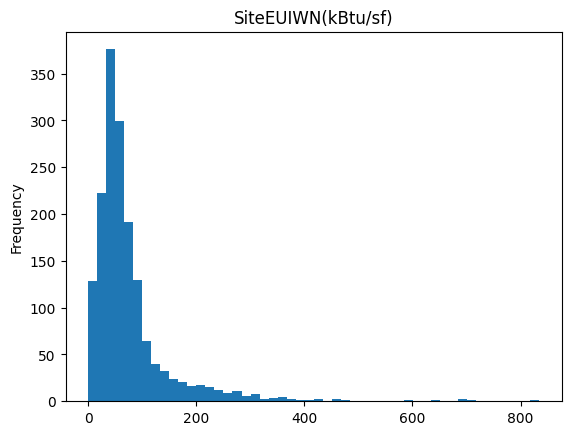

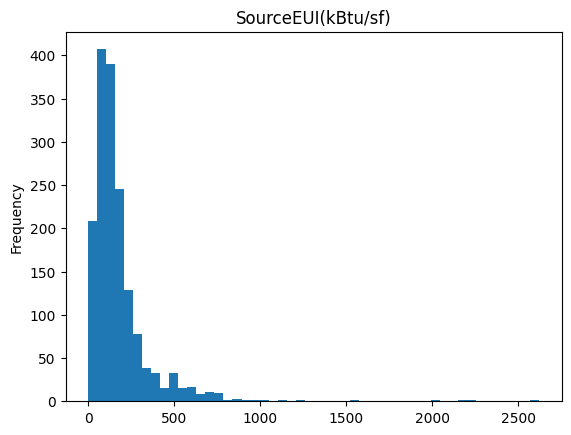

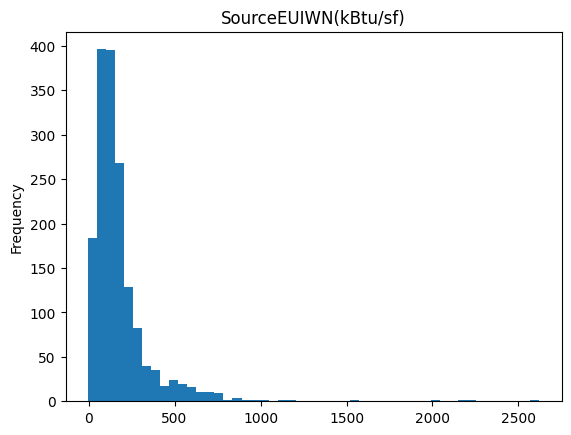

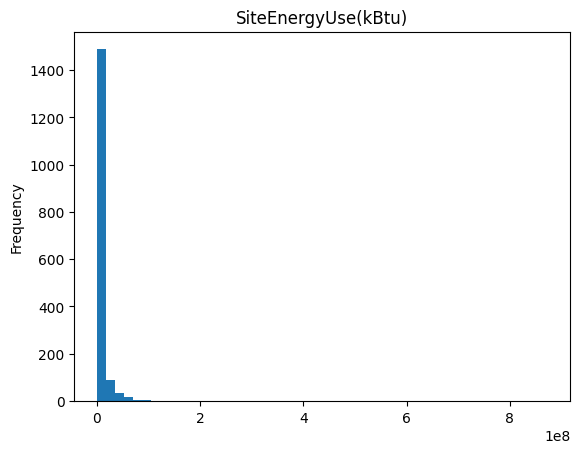

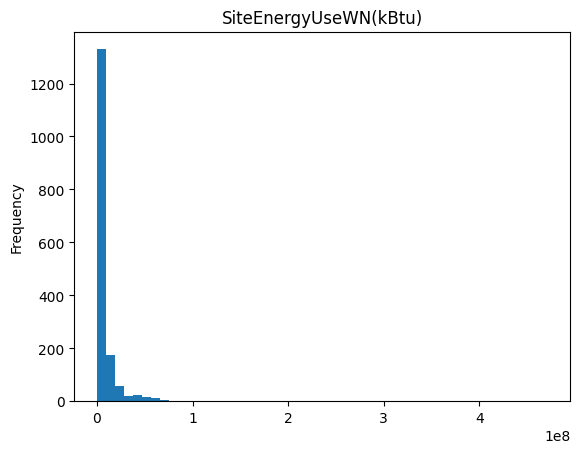

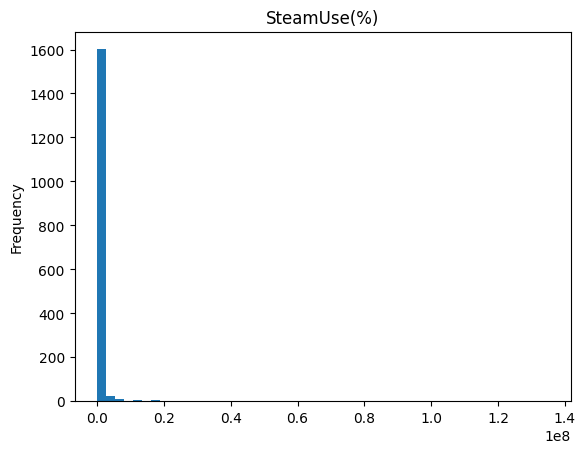

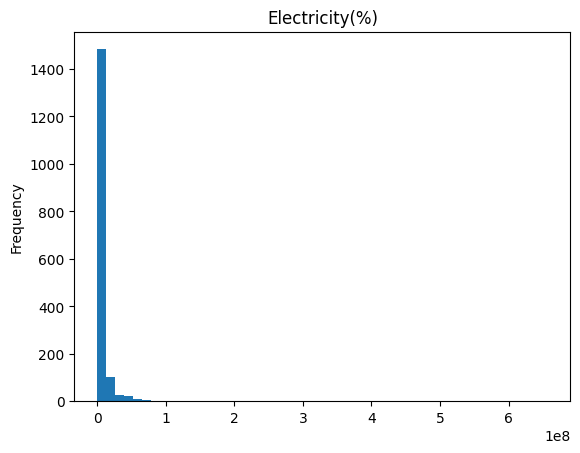

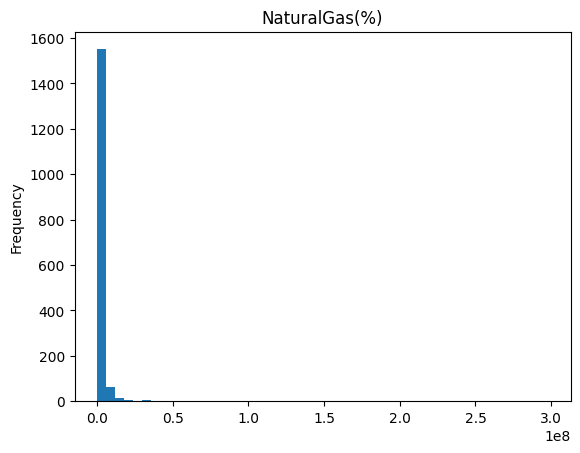

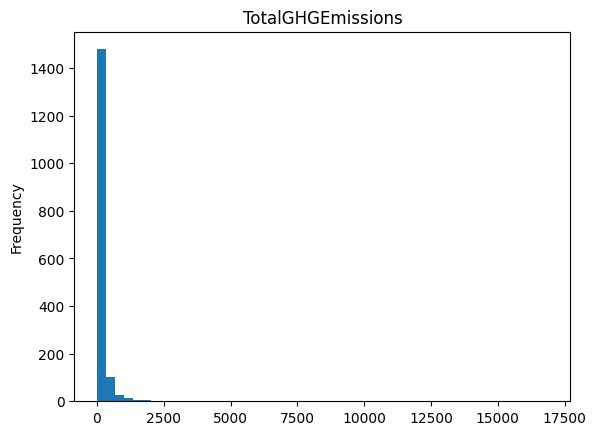

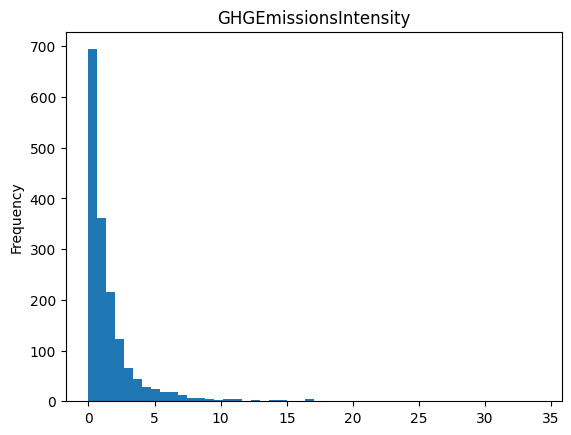

In [14]:
cols = ['NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking(%)',
        'PropertyGFABuilding(s)(%)','LargestPropertyUseTypeGFA','ENERGYSTARScore','SiteEUI(kBtu/sf)',
        'SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUse(kBtu)',
        'SiteEnergyUseWN(kBtu)','SteamUse(%)','Electricity(%)','NaturalGas(%)','TotalGHGEmissions',
        'GHGEmissionsIntensity']

for col in cols:
   df[col].dropna().plot.hist(bins=50, logx=False)
   plt.title(col)
   plt.show()

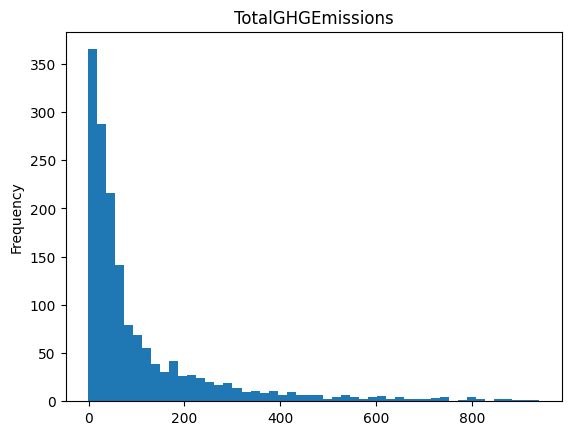

In [15]:
df[df['TotalGHGEmissions']<1000]['TotalGHGEmissions'].dropna().plot.hist(bins=50, logx=False)
plt.title('TotalGHGEmissions')
plt.show()

In [16]:
df.loc[df['TotalGHGEmissions']==0]

,PrimaryPropertyType,CouncilDistrictCode,Age,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking(%),PropertyGFABuilding(s)(%),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(%),Electricity(%),NaturalGas(%),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,
34,K-12 School,3,61,1.0,1,126351,0.0,100.0,126351.0,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,K-12 School,5,27,1.0,2,52792,0.0,100.0,55480.0,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
435,Other,7,26,1.0,6,1400000,0.0,100.0,1072000.0,NaN,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
700,Supermarket / Grocery Store,7,8,1.0,1,57176,0.0,100.0,39500.0,31.0,208.800003,214.100006,0.0,0.0,12525174.0,12843856.0,0.0,0.0,0.0,0.0,0.0
19776,Other,5,14,1.0,1,29924,0.0,100.0,29924.0,NaN,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21616,K-12 School,5,62,1.0,1,42292,0.0,100.0,43188.0,100.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
df['PrimaryPropertyType'].value_counts(normalize=True)

Small- and Mid-Sized Office    0.175045
Other                          0.149606
Warehouse                      0.113265
Large Office                   0.102968
K-12 School                    0.082980
Mixed Use Property             0.069049
Retail Store                   0.053907
Hotel                          0.045427
Worship Facility               0.041793
Distribution Center            0.032102
Supermarket / Grocery Store    0.024228
Medical Office                 0.023622
Self-Storage Facility          0.016959
University                     0.014537
Residence Hall                 0.012720
Senior Care Community          0.012114
Refrigerated Warehouse         0.007268
Restaurant                     0.007268
Hospital                       0.006057
Laboratory                     0.006057
Office                         0.001817
Low-Rise Multifamily           0.001211
Name: PrimaryPropertyType, dtype: float64

In [ ]:
df = pd.get_dummies(df, columns = ['PrimaryPropertyType'])

In [ ]:
df

In [ ]:
df.loc[df['ENERGYSTARScore'].isnull(),'ENERGYSTARScore']=0

In [ ]:
df.insert(loc = 9, column = 'EnergyStarNaN', value = np.where(df['ENERGYSTARScore']!=0, 0, 1))

In [ ]:
df

In [ ]:
cols = ['PropertyGFATotal','LargestPropertyUseTypeGFA','SiteEUI(kBtu/sf)',
        'SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEnergyUse(kBtu)',
        'SiteEnergyUseWN(kBtu)','TotalGHGEmissions',
        'GHGEmissionsIntensity']

In [ ]:
X=df[cols]

In [ ]:
X

In [ ]:
y = df['TotalGHGEmissions'] 

In [ ]:
y_class = np.where(y<100, 0, 1)

In [ ]:
y_class[y_class==0].shape

In [ ]:
y_class[y_class==1].shape

In [ ]:
std_scale = StandardScaler().fit(X)
X_std = std_scale.transform(X)

In [ ]:
for col in cols:
   df[col].dropna().plot.hist(bins=50, logx=False)
   plt.title(col)
   plt.show()

In [ ]:
df.loc[df['TotalGHGEmissions']>5000]

In [ ]:
df.loc[df['NumberofBuildings'].isnull(), 'NumberofBuildings'] = 1

In [ ]:
df.loc[data['LargestPropertyUseTypeGFA'].isnull(), 'LargestPropertyUseTypeGFA'] = \
df.loc[data['LargestPropertyUseTypeGFA'].isnull(), 'PropertyGFATotal']

In [ ]:
df.to_csv('data.csv')